In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import check_random_state
from scipy.stats import ttest_1samp
from sklearn.metrics import pairwise_distances


In [2]:
# Load the saved IS-TR-RSA matrices across ROIs and TRs
npy_file = "/Volumes/ARCHIVES/thesis_pipeline/data/IS_TR_RSA_ROIS/IS_TR_RSA_matrices_all_ROIs.npy"
rsa_matrices = np.load(npy_file)

# Check the dimensions and sample content
print(f"Loaded RSA matrices shape: {rsa_matrices.shape}")
print(f"Sample RSA matrix (Region 0, TR 0):\n{rsa_matrices[0, 0]}")


Loaded RSA matrices shape: (6, 1291, 8, 8)
Sample RSA matrix (Region 0, TR 0):
[[1.00000012e+00 3.58280063e-01 3.63430709e-01 3.70546639e-01
  4.28657144e-01 3.77661496e-01 5.32333314e-01 3.16591710e-01]
 [3.58280063e-01 1.00000000e+00 6.19233131e-01 4.74108160e-01
  3.37872148e-01 3.70413274e-01 4.83037442e-01 1.72313392e-01]
 [3.63430709e-01 6.19233131e-01 1.00000012e+00 3.32206488e-01
  3.04912984e-01 3.76750588e-01 3.73264045e-01 1.67341948e-01]
 [3.70546639e-01 4.74108160e-01 3.32206488e-01 1.00000012e+00
  3.51038009e-01 3.66806298e-01 5.24829090e-01 5.12081504e-01]
 [4.28657144e-01 3.37872148e-01 3.04912984e-01 3.51038009e-01
  1.00000024e+00 3.47161293e-01 3.74337554e-01 3.49258572e-01]
 [3.77661496e-01 3.70413274e-01 3.76750588e-01 3.66806298e-01
  3.47161293e-01 1.00000012e+00 3.81696016e-01 2.19954163e-04]
 [5.32333314e-01 4.83037442e-01 3.73264045e-01 5.24829090e-01
  3.74337554e-01 3.81696016e-01 1.00000000e+00 4.38317716e-01]
 [3.16591710e-01 1.72313392e-01 1.67341948e-01

In [3]:
# Function to perform subject-wise bootstrapping within a similarity matrix
def bootstrap_subject_matrix(similarity_matrix, random_state=None):
    random_state = check_random_state(random_state)
    n_sub = similarity_matrix.shape[0]
    bootstrap_subjects = random_state.choice(np.arange(n_sub), size=n_sub, replace=True)
    return similarity_matrix[bootstrap_subjects, :][:, bootstrap_subjects]

# Test the bootstrapping function on a sample matrix
sample_matrix = rsa_matrices[0, 0]  # Use Region 0, TR 0 as an example
bootstrapped_matrix = bootstrap_subject_matrix(sample_matrix)
print("Bootstrapped matrix (Region 0, TR 0):\n", bootstrapped_matrix)


Bootstrapped matrix (Region 0, TR 0):
 [[1.00000024 0.34716129 0.35103801 0.33787215 0.37433755 0.35103801
  1.00000024 0.37433755]
 [0.34716129 1.00000012 0.3668063  0.37041327 0.38169602 0.3668063
  0.34716129 0.38169602]
 [0.35103801 0.3668063  1.00000012 0.47410816 0.52482909 1.00000012
  0.35103801 0.52482909]
 [0.33787215 0.37041327 0.47410816 1.         0.48303744 0.47410816
  0.33787215 0.48303744]
 [0.37433755 0.38169602 0.52482909 0.48303744 1.         0.52482909
  0.37433755 1.        ]
 [0.35103801 0.3668063  1.00000012 0.47410816 0.52482909 1.00000012
  0.35103801 0.52482909]
 [1.00000024 0.34716129 0.35103801 0.33787215 0.37433755 0.35103801
  1.00000024 0.37433755]
 [0.37433755 0.38169602 0.52482909 0.48303744 1.         0.52482909
  0.37433755 1.        ]]


In [4]:
# Function to calculate the mean of the lower triangle of a matrix
def compute_lower_triangle_mean(matrix):
    return np.mean(matrix[np.tril_indices_from(matrix, k=-1)])

# Test the lower triangle mean computation on the original and bootstrapped matrices
observed_mean = compute_lower_triangle_mean(sample_matrix)
bootstrapped_mean = compute_lower_triangle_mean(bootstrapped_matrix)
print(f"Observed mean of lower triangle (Region 0, TR 0): {observed_mean}")
print(f"Bootstrapped mean of lower triangle (Region 0, TR 0): {bootstrapped_mean}")


Observed mean of lower triangle (Region 0, TR 0): 0.37159645284607123
Bootstrapped mean of lower triangle (Region 0, TR 0): 0.46973553406340735


In [ ]:
regions, trs, subjects, _ = rsa_matrices.shape

# Initialize arrays for observed means and p-values
observed_means = np.zeros((regions, trs))
p_values = np.zeros((regions, trs))

print(f"Initialized observed_means and p_values arrays with shape: {observed_means.shape}")



In [ ]:
# Define the number of bootstraps
n_bootstraps = 10  # Use a smaller number for testing, e.g., 10, to confirm functionality

# Example: Compute observed mean and bootstrap distribution for Region 0, TR 0
roi, tr = 0, 0
subject_corr_matrix = rsa_matrices[roi, tr]
observed_means[roi, tr] = compute_lower_triangle_mean(subject_corr_matrix)

# Generate a bootstrap distribution
null_distribution = np.zeros(n_bootstraps)
for b in range(n_bootstraps):
    bootstrapped_matrix = bootstrap_subject_matrix(subject_corr_matrix)
    null_distribution[b] = compute_lower_triangle_mean(bootstrapped_matrix)

# Display observed mean and bootstrap distribution
print(f"Observed mean (Region 0, TR 0): {observed_means[roi, tr]}")
print(f"Bootstrap distribution (first 10 values): {null_distribution}")


In [ ]:
# Calculate p-value as the proportion of bootstrapped means >= observed mean
p_value = np.mean(null_distribution >= observed_means[roi, tr])
p_values[roi, tr] = p_value

# Display the calculated p-value
print(f"P-value for Region 0, TR 0: {p_value}")


In [ ]:

n_bootstraps = 5000  # Number of bootstrap iterations
alpha = 0.05  # Significance level
top_n = 5  # Number of most significant results to plot

# Store observed means and p-values for each region and TR
observed_means = np.zeros((regions, trs))
p_values = np.zeros((regions, trs))

# Full bootstrapping loop
for roi in range(regions):
    for tr in range(trs):
        subject_corr_matrix = rsa_matrices[roi, tr]
        
        # Compute observed mean
        observed_means[roi, tr] = compute_lower_triangle_mean(subject_corr_matrix)
        
        # Generate bootstrap distribution
        null_distribution = np.zeros(n_bootstraps)
        for b in range(n_bootstraps):
            bootstrapped_matrix = bootstrap_subject_matrix(subject_corr_matrix)
            null_distribution[b] = compute_lower_triangle_mean(bootstrapped_matrix)
        
        # Compute p-value
        p_values[roi, tr] = np.mean(null_distribution >= observed_means[roi, tr])

    print(f"Completed bootstrapping for Region {roi + 1}/{regions}")

# Flatten p-values and observed_means for easy sorting by significance
flat_p_values = p_values.flatten()
flat_observed_means = observed_means.flatten()
flat_indices = np.argsort(flat_p_values)[:top_n]  # Indices of the top N significant results

# Plot null distributions for top N significant results
for idx in flat_indices:
    roi = idx // trs  # Get region index
    tr = idx % trs    # Get TR index
    
    subject_corr_matrix = rsa_matrices[roi, tr]
    observed_mean = observed_means[roi, tr]
    
    # Generate bootstrap distribution
    null_distribution = np.zeros(n_bootstraps)
    for b in range(n_bootstraps):
        bootstrapped_matrix = bootstrap_subject_matrix(subject_corr_matrix)
        null_distribution[b] = compute_lower_triangle_mean(bootstrapped_matrix)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.hist(null_distribution, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Null Distribution')
    plt.axvline(x=observed_mean, color='red', linestyle='--', linewidth=2, label='Observed Mean')
    
    # Calculate significance threshold (95th percentile of null distribution)
    significance_threshold = np.percentile(null_distribution, 100 * (1 - alpha))
    plt.axvline(x=significance_threshold, color='purple', linestyle='--', linewidth=2, label=f'Significance Threshold ({alpha * 100}%)')

    # Add labels and title
    plt.title(f'Top Significant Null vs. Observed\nRegion: {roi + 1}, TR: {tr + 1}, p = {flat_p_values[idx]:.4f}')
    plt.xlabel('Mean of Lower Triangle')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


Since single TRs fails to show significant correlations across participants it makes sense to create bins across the run. 

In [5]:
# Define the number of bins and calculate TRs per bin
n_bins = 37
regions, trs, subjects, _ = rsa_matrices.shape
trs_per_bin = trs // n_bins  # Approximately 35 TRs per bin

# Reshape the data to group TRs sequentially into bins
binned_rsa_matrices = rsa_matrices[:, :n_bins * trs_per_bin].reshape(regions, n_bins, trs_per_bin, subjects, subjects)

# Validation Output: Check binning structure
print(f"Binned RSA Matrices Shape: {binned_rsa_matrices.shape}")
print(f"Sample Data for Region 0, Bin 0 (Mean of Bin TRs):\n{np.mean(binned_rsa_matrices[0, 0], axis=0)}")


Binned RSA Matrices Shape: (6, 37, 34, 8, 8)
Sample Data for Region 0, Bin 0 (Mean of Bin TRs):
[[1.00000008 0.30161758 0.34723668 0.23108798 0.25771895 0.25563321
  0.30704751 0.31852443]
 [0.30161758 1.00000012 0.22754315 0.21049704 0.24337087 0.23616169
  0.31274621 0.31421169]
 [0.34723668 0.22754315 1.00000008 0.27226652 0.30195237 0.28156934
  0.2933786  0.29805579]
 [0.23108798 0.21049704 0.27226652 1.00000007 0.24151004 0.26063026
  0.20734904 0.25263849]
 [0.25771895 0.24337087 0.30195237 0.24151004 1.00000007 0.2731675
  0.24332582 0.27087467]
 [0.25563321 0.23616169 0.28156934 0.26063026 0.2731675  1.00000007
  0.22412913 0.27725382]
 [0.30704751 0.31274621 0.2933786  0.20734904 0.24332582 0.22412913
  1.00000007 0.32727797]
 [0.31852443 0.31421169 0.29805579 0.25263849 0.27087467 0.27725382
  0.32727797 1.00000005]]


In [6]:
# Initialize arrays for observed means and p-values
observed_means = np.zeros((regions, n_bins))
p_values = np.zeros((regions, n_bins))

n_bootstraps = 5000  # Set to a higher number for the full analysis

for roi in range(regions):
    for bin_idx in range(n_bins):
        # Calculate the mean similarity matrix for the current bin
        mean_bin_matrix = np.mean(binned_rsa_matrices[roi, bin_idx], axis=0)
        
        # Compute the observed mean for the bin
        observed_means[roi, bin_idx] = compute_lower_triangle_mean(mean_bin_matrix)
        
        # Generate bootstrap distribution
        null_distribution = np.zeros(n_bootstraps)
        for b in range(n_bootstraps):
            bootstrapped_matrix = bootstrap_subject_matrix(mean_bin_matrix)
            null_distribution[b] = compute_lower_triangle_mean(bootstrapped_matrix)
        
        # Compute p-value
        p_values[roi, bin_idx] = np.mean(null_distribution >= observed_means[roi, bin_idx])

    print(f"Completed bootstrapping for Region {roi + 1}/{regions}")

# Save p-values in the specified directory
save_path = '/Volumes/ARCHIVES/thesis_pipeline/data/IS_TR_RSA_ROIS/IS_TR_RSA_ROIS_Pvalues.npy'
np.save(save_path, p_values)
print(f"Saved p-values at {save_path}")


Completed bootstrapping for Region 1/6
Completed bootstrapping for Region 2/6
Completed bootstrapping for Region 3/6
Completed bootstrapping for Region 4/6
Completed bootstrapping for Region 5/6
Completed bootstrapping for Region 6/6
Saved p-values at /Volumes/ARCHIVES/thesis_pipeline/data/IS_TR_RSA_ROIS/IS_TR_RSA_ROIS_Pvalues.npy


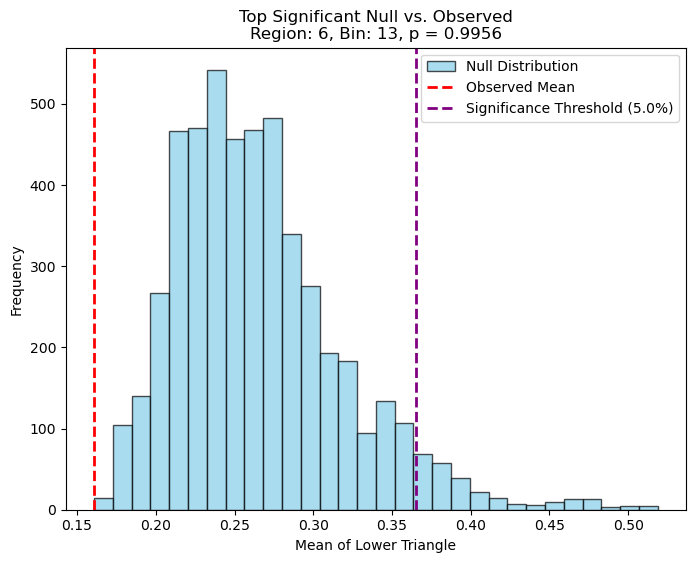

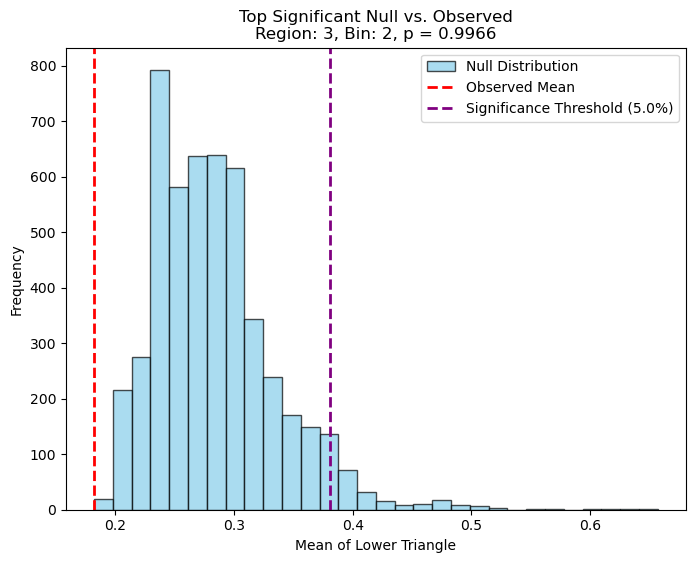

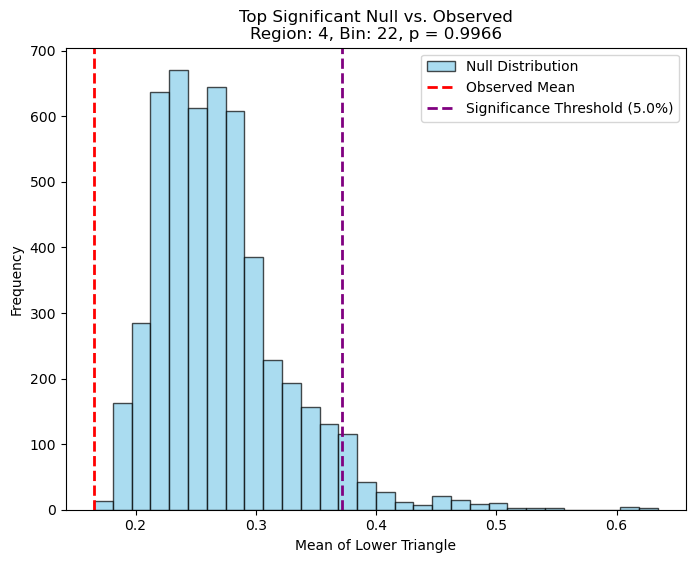

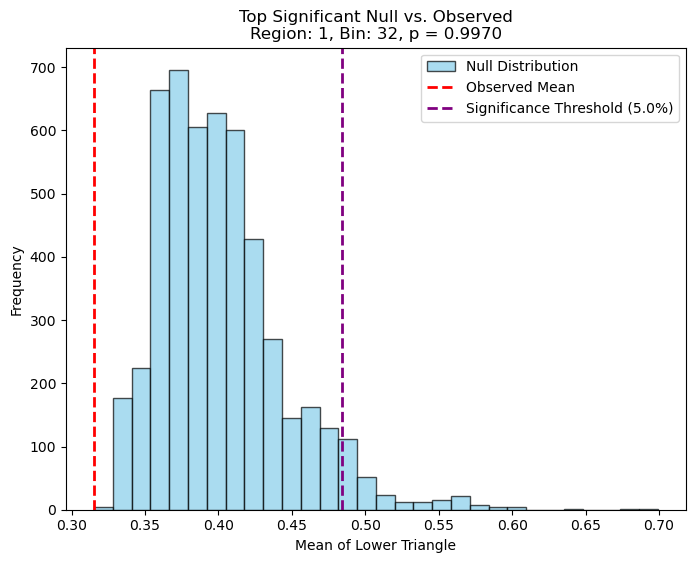

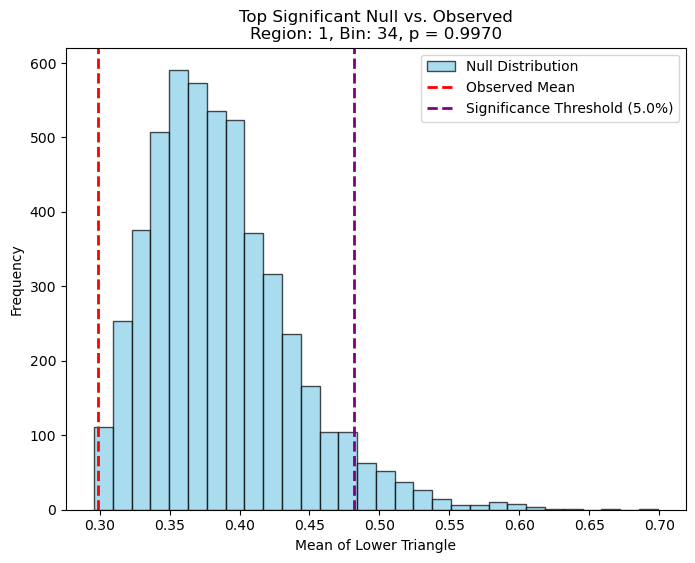

Region with highest IS-RSA significance: IFGorb (Region: 6, Bin: 13)


In [8]:
top_n = 5  # Number of most significant results to plot
flat_p_values = p_values.flatten()
flat_observed_means = observed_means.flatten()
flat_indices = np.argsort(flat_p_values)[:top_n]  # Indices of the top N significant results
alpha = 0.05 

# Plot top significant results
for idx in flat_indices:
    roi = idx // n_bins  # Get region index
    bin_idx = idx % n_bins  # Get bin index
    mean_bin_matrix = np.mean(binned_rsa_matrices[roi, bin_idx], axis=0)
    observed_mean = observed_means[roi, bin_idx]
    
    # Generate bootstrap distribution
    null_distribution = np.zeros(n_bootstraps)
    for b in range(n_bootstraps):
        bootstrapped_matrix = bootstrap_subject_matrix(mean_bin_matrix)
        null_distribution[b] = compute_lower_triangle_mean(bootstrapped_matrix)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.hist(null_distribution, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Null Distribution')
    plt.axvline(x=observed_mean, color='red', linestyle='--', linewidth=2, label='Observed Mean')
    
    # Calculate significance threshold
    significance_threshold = np.percentile(null_distribution, 100 * (1 - alpha))
    plt.axvline(x=significance_threshold, color='purple', linestyle='--', linewidth=2, label=f'Significance Threshold ({alpha * 100}%)')

    # Add labels and title
    plt.title(f'Top Significant Null vs. Observed\nRegion: {roi + 1}, Bin: {bin_idx + 1}, p = {flat_p_values[idx]:.4f}')
    plt.xlabel('Mean of Lower Triangle')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Determine the region with the most significant p-values
min_p_value_indices = np.unravel_index(np.argmin(p_values, axis=None), p_values.shape)
roi_names = ['PTL', 'ATL', 'AG', 'IFG', 'MFG', 'IFGorb']
most_significant_region = roi_names[min_p_value_indices[0]]
print(f"Region with highest IS-RSA significance: {most_significant_region} (Region: {min_p_value_indices[0] + 1}, Bin: {min_p_value_indices[1] + 1})")
